In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import itertools
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings('ignore', message='.*TensorFlow.*')


#**Leaf Dataset**

In [ ]:
# Downloading the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00288/leaf.zip


# Loading the dataset
path = 'leaf.csv'
features = ['Class', 'Specimen Number', 'Eccentricity', 'Aspect Ratio',
            'Elongation', 'Solidity', 'Stochastic Convexity', 'Isoperimetric Factor',
            'Maximal Indentation Depth', 'Lobedness', 'Average Intensity', 'Average Contrast',
            'Smoothness', 'Third moment', 'Uniformity', 'Entropy']
df = pd.read_csv(path, header=None, names=features)

df.head()

--2023-04-25 00:09:03--  https://archive.ics.uci.edu/ml/machine-learning-databases/00288/leaf.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 81762392 (78M) [application/x-httpd-php]
Saving to: ‘leaf.zip.2’

leaf.zip.2          100%[===================>]  77.97M  30.2MB/s    in 2.6s    

2023-04-25 00:09:06 (30.2 MB/s) - ‘leaf.zip.2’ saved [81762392/81762392]



Class  Specimen Number  Eccentricity  Aspect Ratio  Elongation  Solidity  \
0      1                1       0.72694        1.4742     0.32396   0.98535   
1      1                2       0.74173        1.5257     0.36116   0.98152   
2      1                3       0.76722        1.5725     0.38998   0.97755   
3      1                4       0.73797        1.4597     0.35376   0.97566   
4      1                5       0.82301        1.7707     0.44462   0.97698   

   Stochastic Convexity  Isoperimetric Factor  Maximal Indentation Depth  \
0               1.00000               0.83592                   0.004657   
1               0.99825               0.79867                   0.005242   
2               1.00000               0.80812                   0.007457   
3               1.00000               0.81697                   0.006877   
4               1.00000               0.75493                   0.007428   

   Lobedness  Average Intensity  Average Contrast  Smoothness  Third moment  \
0   0.003947           0.047790          0.127950    0.016108      0.005232   
1   0.005002           0.024160          0.090476    0.008119      0.002708   
2   0.010121           0.011897          0.057445    0.003289      0.000921   
3   0.008607           0.015950          0.065491    0.004271      0.001154   
4   0.010042           0.007938          0.045339    0.002051      0.000560   

   Uniformity  Entropy  
0    0.000275  1.17560  
1    0.000075  0.69659  
2    0.000038  0.44348  
3    0.000066  0.58785  
4    0.000024  0.34214

Splitting into features and Labels

In [43]:
# Split into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, 0].values




# Print number of instances and features
print("Number of instances:", X.shape[0])
print("Number of features:", X.shape[1])

Number of instances: 340
Number of features: 15


In [44]:
# Convert labels to integers
unique_labels = np.unique(y)
label_dict = {}
for i in range(len(unique_labels)):
    label_dict[unique_labels[i]] = i
y = np.array([label_dict[label] for label in y])

print('Class labels:', np.unique(y))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define column names
features = df.columns[1:]

# Convert X_train and X_test to dataframes
X_train = pd.DataFrame(X_train, columns=features)
X_test = pd.DataFrame(X_test, columns=features)

# Scale the features
sc = StandardScaler()
X_train_std = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

# Define unique labels
unique_labels = np.unique(y_test)


Class labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


Confusion Matrix

In [ ]:
#Define a function to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False,title='Confusion matrix', cmap=plt.cm.Blues):

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
             plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

## **Logistic Regression**
Logistic Regression with Confusion Matrix and ROC curve

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_std, y_train)
y_pred_lr = lr.predict(X_test_std)
acc_lr = accuracy_score(y_test, y_pred_lr)
prec_lr = precision_score(y_test, y_pred_lr, average='weighted')
rec_lr = recall_score(y_test, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
cm_lr = confusion_matrix(y_test, y_pred_lr)

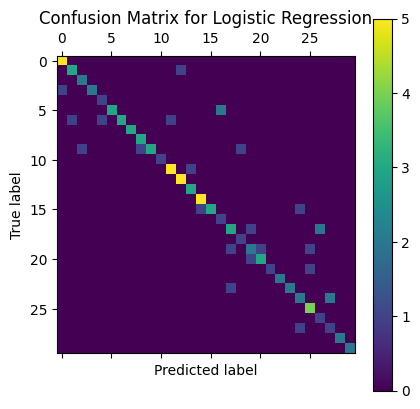

Confusion matrix, without normalization


In [ ]:
# Compute confusion matrix for logistic regression
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Display confusion matrix for logistic regression
plt.matshow(cm_lr)
plt.title('Confusion Matrix for Logistic Regression')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#Plot the confusion matrix for Logistic Regression
plt.figure()
plot_confusion_matrix(cm_lr, classes=unique_labels,title='Confusion matrix, Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for each class
y_prob_lr = lr.predict_proba(X_test_std)

# Calculate ROC curve and AUC for each class
fpr_lr = {}
tpr_lr = {}
roc_auc_lr = {}
for i in range(len(unique_labels)):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test, y_prob_lr[:, i], pos_label=i)
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

# Plot ROC curve for each class
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(unique_labels)), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(unique_labels[i], roc_auc_lr[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


## **Random Forest**
Random forest classifier with confusion matrix and ROC curve

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_std, y_train)
y_pred_rf = rf.predict(X_test_std)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf, average='weighted')
rec_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
cm_rf = confusion_matrix(y_test, y_pred_rf)

Confusion matrix, without normalization


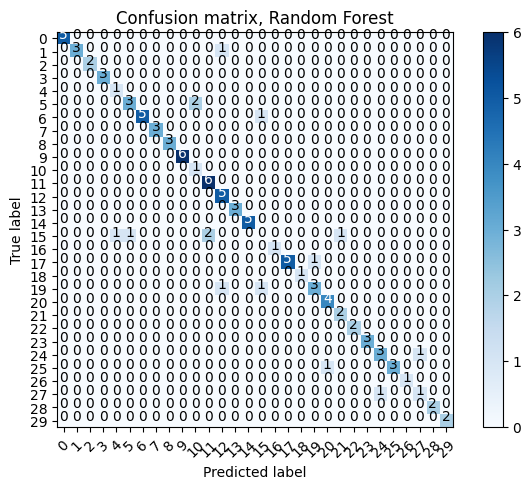

In [ ]:
# Compute confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Display confusion matrix for Random Forest
plt.matshow(cm_rf)
plt.title('Confusion Matrix for Random Forest')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#Plot the confusion matrix for Random Forest
plt.figure()
plot_confusion_matrix(cm_rf, classes=unique_labels,
title='Confusion matrix, Random Forest')
plt.show()

In [ ]:
# Get predicted probabilities for each class
y_prob_rf = rf.predict_proba(X_test_std)

# Calculate ROC curve and AUC for each class
fpr_rf = {}
tpr_rf = {}
roc_auc_rf = {}
for i in range(len(unique_labels)):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test, y_prob_rf[:, i], pos_label=i)
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curve for each class
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(unique_labels)), colors):
    plt.plot(fpr_rf[i], tpr_rf[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(unique_labels[i], roc_auc_rf[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


## **SVM**
SVM with confusion matrix and ROC curve

In [ ]:
# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train_std, y_train)
y_pred_svm = svm.predict(X_test_std)
acc_svm = accuracy_score(y_test, y_pred_svm)
prec_svm = precision_score(y_test, y_pred_svm, average='weighted')
rec_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
cm_svm = confusion_matrix(y_test, y_pred_svm)

Confusion matrix, without normalization


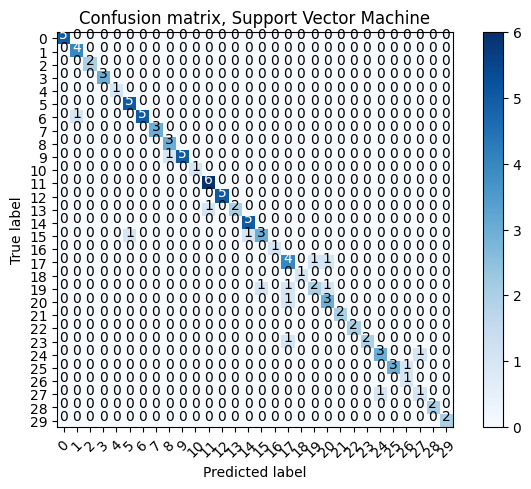

In [ ]:
# Compute confusion matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrix for SVM
plt.matshow(cm_svm)
plt.title('Confusion Matrix for SVM')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

#Plot the confusion matrix for Support Vector Machine
plt.figure()
plot_confusion_matrix(cm_svm, classes=unique_labels,
title='Confusion matrix, Support Vector Machine')
plt.show()

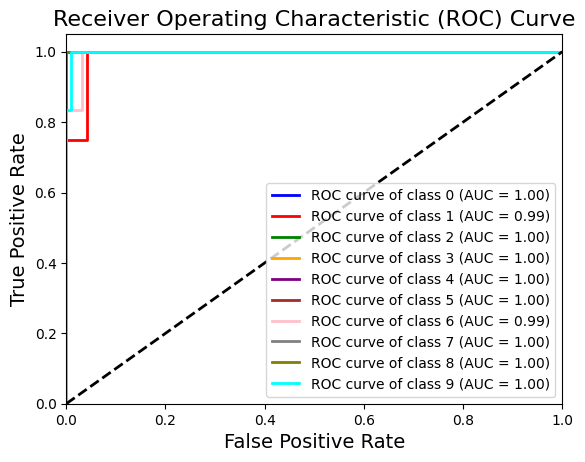

In [ ]:
# Get predicted probabilities for each class
y_prob_svm = svm.decision_function(X_test_std)

# Calculate ROC curve and AUC for each class
fpr_svm = {}
tpr_svm = {}
roc_auc_svm = {}
for i in range(len(unique_labels)):
    fpr_svm[i], tpr_svm[i], _ = roc_curve(y_test, y_prob_svm[:, i], pos_label=i)
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curve for each class
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
for i, color in zip(range(len(unique_labels)), colors):
    plt.plot(fpr_svm[i], tpr_svm[i], color=color, lw=2, label='ROC curve of class {0} (AUC = {1:0.2f})'.format(unique_labels[i], roc_auc_svm[i]))

# Plot random guessing line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


Performance metrics for each model

In [ ]:
#Print the performance metrics for each model
print('Logistic Regression:')
print('Accuracy:', acc_lr)
print('Precision:', prec_lr)
print('Recall:', rec_lr)
print('F1 Score:', f1_lr)

print('\nRandom Forest:')
print('Accuracy:', acc_rf)
print('Precision:', prec_rf)
print('Recall:', rec_rf)
print('F1 Score:', f1_rf)

print('\nSupport Vector Machine:')
print('Accuracy:', acc_svm)
print('Precision:', prec_svm)
print('Recall:', rec_svm)
print('F1 Score:', f1_svm)

Logistic Regression:
Accuracy: 0.7549019607843137
Precision: 0.808169934640523
Recall: 0.7549019607843137
F1 Score: 0.7533415386356562

Random Forest:
Accuracy: 0.8529411764705882
Precision: 0.8523342670401494
Recall: 0.8529411764705882
F1 Score: 0.8437710437710437

Support Vector Machine:
Accuracy: 0.8529411764705882
Precision: 0.8660597572362277
Recall: 0.8529411764705882
F1 Score: 0.8505195240489359


Eigen values

In [ ]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('Eigenvalues \n', eigen_vals)

Eigenvalues 
 [1.27297045e+02 1.14642378e+01 6.21380908e+00 1.07577533e+00
 3.58385150e-02 2.90182528e-02 4.06054982e-03 2.63232695e-03
 1.79195822e-03 1.04625018e-03 8.83919018e-05 6.80725039e-05
 7.12621538e-06 1.12698205e-07 2.51207039e-08]


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[ 9.97892856e-01 -1.67017629e-02]
 [-1.11065168e-02 -9.95907359e-01]
 [ 1.83560841e-03  5.81542578e-03]
 [ 6.36928325e-02  8.64591908e-02]
 [ 2.56367003e-03  1.92265201e-03]
 [ 1.54433362e-03  3.25719316e-03]
 [ 5.58232568e-04  2.11148081e-03]
 [-7.07845216e-04 -1.36791149e-03]
 [-2.30920273e-04 -7.34120299e-04]
 [-4.00202285e-03 -1.89564596e-02]
 [ 4.57331812e-04 -3.21878686e-05]
 [ 5.16264842e-04 -2.08939767e-04]
 [ 1.73434344e-04 -7.60007135e-05]
 [ 4.95160239e-05 -3.44755386e-05]
 [ 8.34370950e-06  5.78374580e-06]]


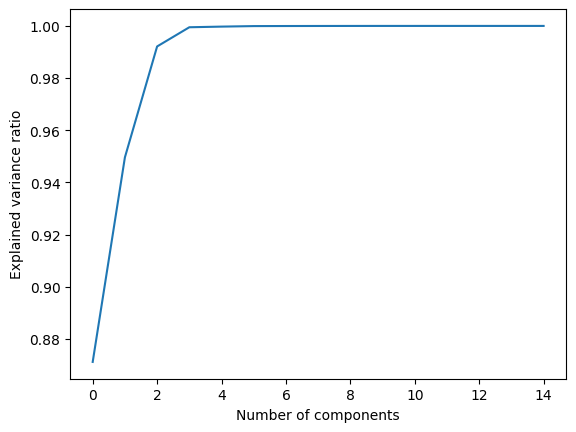

In [ ]:
explained_variance_ratio = eigen_vals / np.sum(eigen_vals)
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_explained_variance_ratio)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

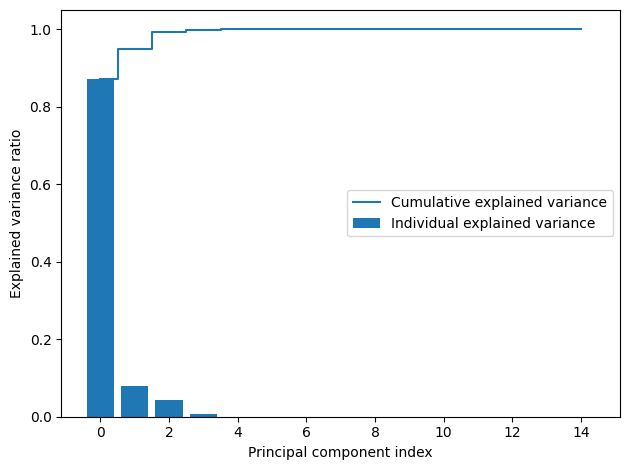

In [ ]:
plt.bar(range(0,15), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(0,15), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='center right')
plt.tight_layout()
plt.show()

# **PCA**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


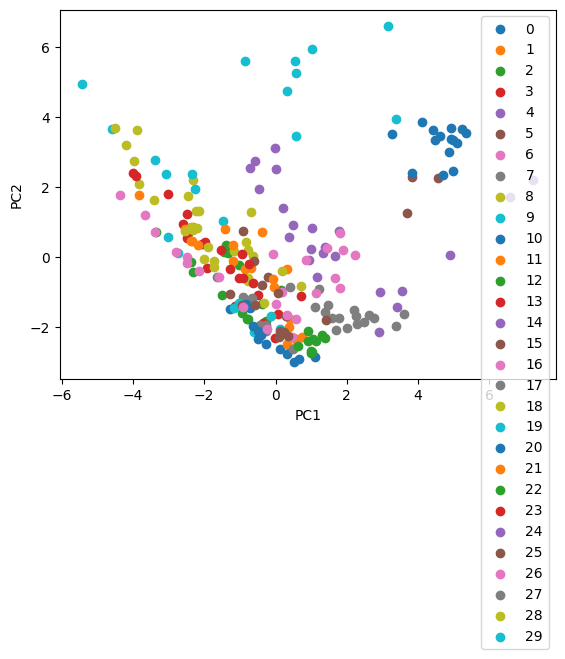

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

# Logistic Regression with PCA
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
y_pred_lr_pca = lr_pca.predict(X_test_pca)
acc_lr_pca = accuracy_score(y_test, y_pred_lr_pca)
prec_lr_pca = precision_score(y_test, y_pred_lr_pca, average='weighted')
rec_lr_pca = recall_score(y_test, y_pred_lr_pca, average='weighted')
f1_lr_pca = f1_score(y_test, y_pred_lr_pca, average='weighted')
cm_lr_pca = confusion_matrix(y_test, y_pred_lr_pca)

# Random Forest with PCA
rf_pca = RandomForestClassifier(n_estimators=100)
rf_pca.fit(X_train_pca, y_train)
y_pred_rf_pca = rf_pca.predict(X_test_pca)
acc_rf_pca = accuracy_score(y_test, y_pred_rf_pca)
prec_rf_pca = precision_score(y_test, y_pred_rf_pca, average='weighted')
rec_rf_pca = recall_score(y_test, y_pred_rf_pca, average='weighted')
f1_rf_pca = f1_score(y_test, y_pred_rf_pca, average='weighted')
cm_rf_pca = confusion_matrix(y_test, y_pred_rf_pca)

# Support Vector Machine with PCA
svm_pca = SVC(kernel='linear')
svm_pca.fit(X_train_pca, y_train)
y_pred_svm_pca = svm_pca.predict(X_test_pca)
acc_svm_pca = accuracy_score(y_test, y_pred_svm_pca)
prec_svm_pca = precision_score(y_test, y_pred_svm_pca, average='weighted')
rec_svm_pca = recall_score(y_test, y_pred_svm_pca, average='weighted')
f1_svm_pca = f1_score(y_test, y_pred_svm_pca, average='weighted')
cm_svm_pca = confusion_matrix(y_test, y_pred_svm_pca)

# Plot the reduced dataset

for label in unique_labels:
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                label=label)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


performance metrics for each model with PCA

In [ ]:
#Print the performance metrics for each model with PCA
print('\nLogistic Regression with PCA:')
print('Accuracy:', acc_lr_pca)
print('Precision:', prec_lr_pca)
print('Recall:', rec_lr_pca)
print('F1 Score:', f1_lr_pca)

print('\nRandom Forest with PCA:')
print('Accuracy:', acc_rf_pca)
print('Precision:', prec_rf_pca)
print('Recall:', rec_rf_pca)
print('F1 Score:', f1_rf_pca)

print('\nSupport Vector Machine with PCA:')
print('Accuracy:', acc_svm_pca)
print('Precision:', prec_svm_pca)
print('Recall:', rec_svm_pca)
print('F1 Score:', f1_svm_pca)


Logistic Regression with PCA:
Accuracy: 0.24509803921568626
Precision: 0.24265873015873013
Recall: 0.24509803921568626
F1 Score: 0.1835864411123927

Random Forest with PCA:
Accuracy: 0.21568627450980393
Precision: 0.2611344537815126
Recall: 0.21568627450980393
F1 Score: 0.20736425883484708

Support Vector Machine with PCA:
Accuracy: 0.35294117647058826
Precision: 0.29179894179894184
Recall: 0.35294117647058826
F1 Score: 0.29385553892474303


Plotting decision regions for logistic regression classifier with PCA

/usr/local/lib/python3.9/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


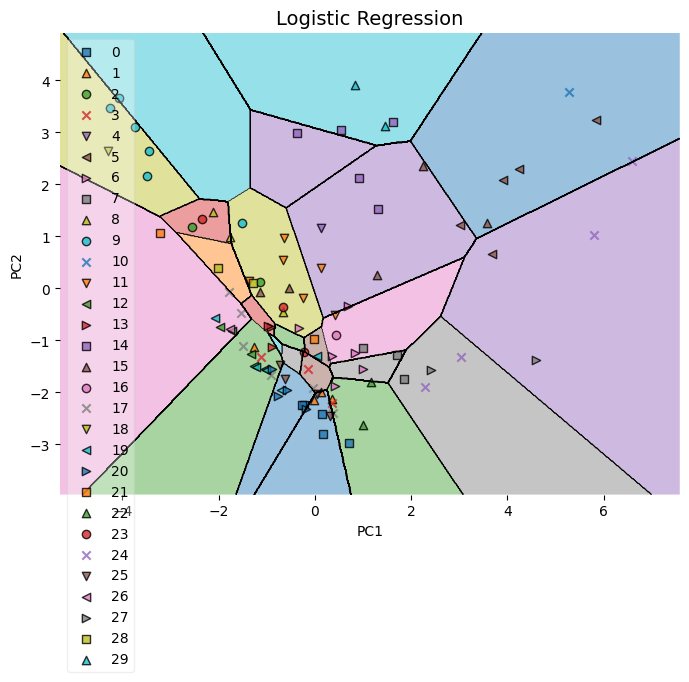

In [ ]:
# Define classifier with PCA
classifiers_pca = {'Logistic Regression': lr_pca}

# Plot decision regions for classifiers with PCA
for clf_name, clf in classifiers_pca.items():
    fig, ax = plt.subplots(figsize=(8, 6))
    plot_decision_regions(X_test_pca, y_test, clf=clf, legend=2, ax=ax)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(clf_name, fontsize=14)
    plt.show()


Hyperparameters and Heatmap of Different Classifiers i.e, Logistic Regression, Random Forest Classifier and SVM Classifier

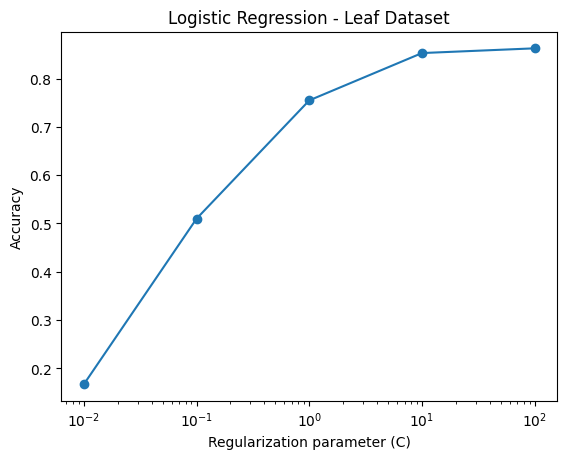

In [ ]:
import matplotlib.pyplot as plt

# Logistic Regression
C_range = [0.01, 0.1, 1, 10, 100]
acc_lr = []
for C in C_range:
    lr = LogisticRegression(C=C, max_iter=1000)
    lr.fit(X_train_std, y_train)
    y_pred_lr = lr.predict(X_test_std)
    acc_lr.append(accuracy_score(y_test, y_pred_lr))

plt.plot(C_range, acc_lr, '-o')
plt.xscale('log')
plt.xlabel('Regularization parameter (C)')
plt.ylabel('Accuracy')
plt.title('Logistic Regression - Leaf Dataset')
plt.show()

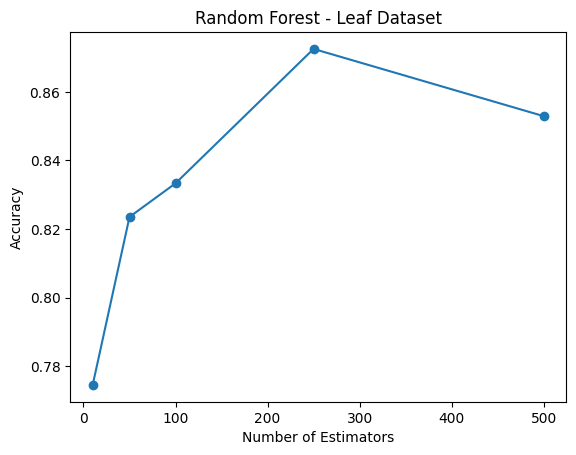

In [ ]:
# Random Forest
n_estimators_range = [10, 50, 100, 250, 500]
acc_rf = []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n)
    rf.fit(X_train_std, y_train)
    y_pred_rf = rf.predict(X_test_std)
    acc_rf.append(accuracy_score(y_test, y_pred_rf))

plt.plot(n_estimators_range, acc_rf, '-o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Random Forest - Leaf Dataset')
plt.show()

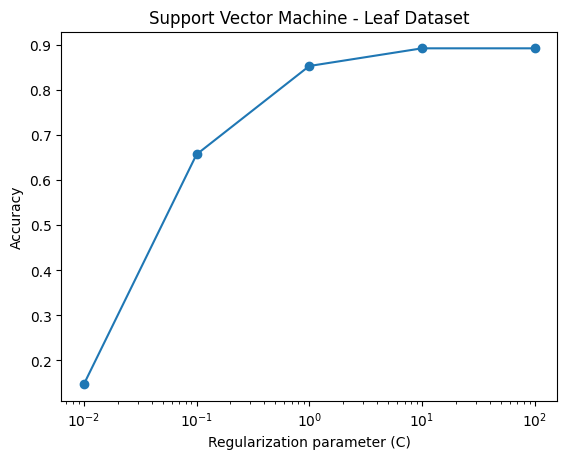

In [ ]:
# Support Vector Machine
C_range_s = [0.01, 0.1, 1, 10, 100]
acc_svm = []
for C in C_range:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train_std, y_train)
    y_pred_svm = svm.predict(X_test_std)
    acc_svm.append(accuracy_score(y_test, y_pred_svm))

plt.plot(C_range_s, acc_svm, '-o')
plt.xscale('log')
plt.xlabel('Regularization parameter (C)')
plt.ylabel('Accuracy')
plt.title('Support Vector Machine - Leaf Dataset')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


# Define the parameter grid for each classifier
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_svm = {'C': [0.01, 0.1, 1, 10, 100]}
param_grid_rf = {'n_estimators': [10, 50, 100, 250, 500], 
                 'max_depth': [10, 20, 30, 40, None],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['sqrt', 'log2', None]}

In [ ]:
# Logistic Regression
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, scoring='accuracy', cv=10)
grid_lr.fit(X_train_std, y_train)
acc_lr_grid = grid_lr.cv_results_['mean_test_score'].reshape(len(param_grid_lr['C']), 1)
best_params_lr = grid_lr.best_params_

In [ ]:
# Support Vector Machine 
grid_svm = GridSearchCV(SVC(), param_grid_svm, scoring='accuracy', cv=10)
grid_svm.fit(X_train_std, y_train)
acc_svm_grid = grid_svm.cv_results_['mean_test_score'].reshape(len(param_grid_svm['C']), 1)
best_params_svm = grid_svm.best_params_

In [35]:
# Random Forest
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, scoring='accuracy', cv=10, n_jobs=-1)
grid_rf.fit(X_train_std, y_train)
acc_rf_grid = grid_rf.cv_results_['mean_test_score'].reshape(len(param_grid_rf['n_estimators']), 
                                                             len(param_grid_rf['max_depth']), 
                                                             len(param_grid_rf['min_samples_split']), 
                                                             len(param_grid_rf['min_samples_leaf']), 
                                                             len(param_grid_rf['max_features']))
best_params_rf = grid_rf.best_params_

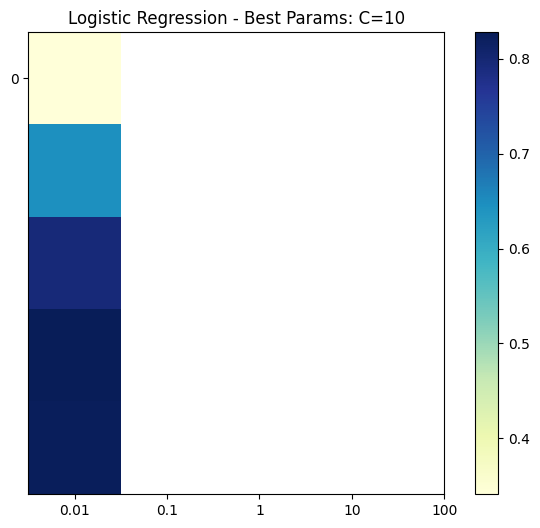

In [40]:
# Logistic Regression
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(acc_lr_grid, cmap='YlGnBu')
ax.set_xticks(np.arange(len(param_grid_lr['C'])))
ax.set_yticks([0])
ax.set_xticklabels(param_grid_lr['C'])
ax.set_title('Logistic Regression - Best Params: C={}'.format(best_params_lr['C']))
plt.colorbar(im, ax=ax)
plt.show()

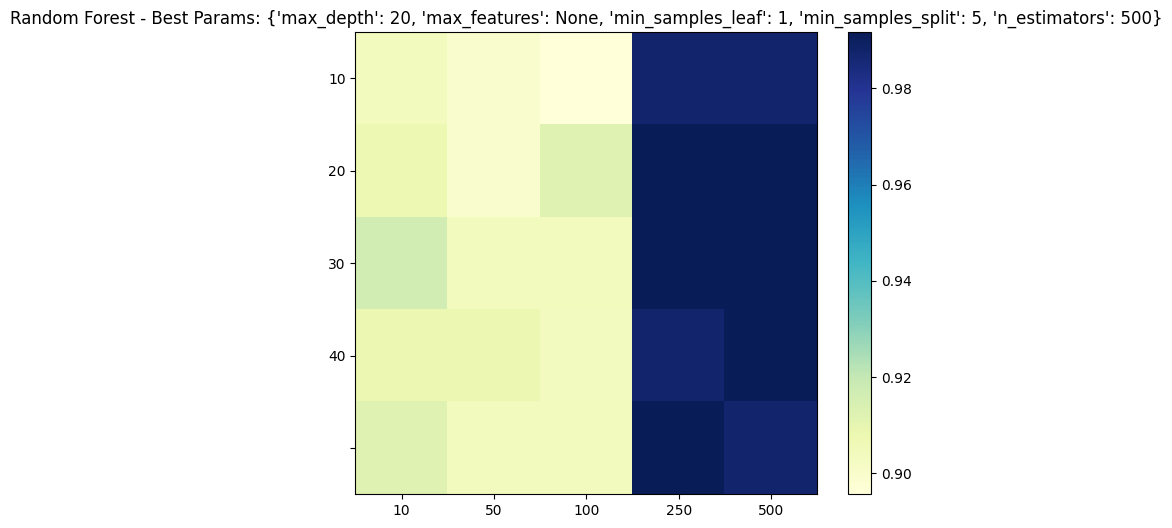

In [42]:
# Random Forest
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(np.max(acc_rf_grid, axis=(2,3,4)), cmap='YlGnBu')
ax.set_xticks(np.arange(len(param_grid_rf['n_estimators'])))
ax.set_yticks(np.arange(len(param_grid_rf['max_depth'])))
ax.set_xticklabels(param_grid_rf['n_estimators'])
ax.set_yticklabels(param_grid_rf['max_depth'])
ax.set_title('Random Forest - Best Params: {}'.format(best_params_rf))
plt.colorbar(im, ax=ax)
plt.show()

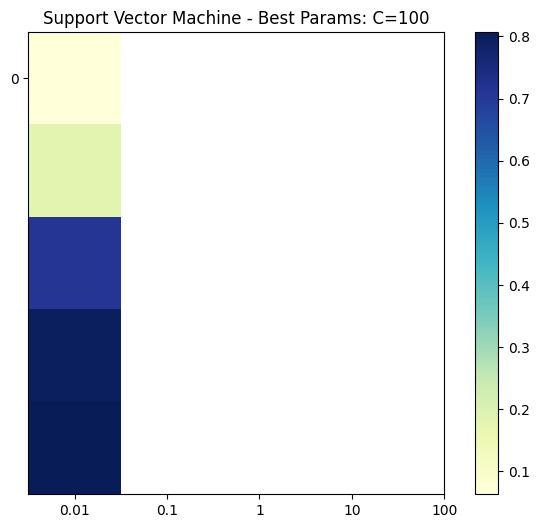

In [41]:
# Support Vector Machine
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(acc_svm_grid, cmap='YlGnBu')
ax.set_xticks(np.arange(len(param_grid_svm['C'])))
ax.set_yticks([0])
ax.set_xticklabels(param_grid_svm['C'])
ax.set_title('Support Vector Machine - Best Params: C={}'.format(best_params_svm['C']))
plt.colorbar(im, ax=ax)
plt.show()